# Mission 136 : Data Cleaning Walkthrough

## Reading in the data

In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for file in data_files:
    key_name = file.replace(".csv", "")
    data[key_name] = pd.read_csv(file)
# print(data)

## Exploring the SAT data

What we're mainly interested in is the SAT data set, which corresponds to the dictionary key sat_results. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

Let's explore sat_results to see what we can discover. Exploring the dataframe will help us understand the structure of the data, and make it easier for us to analyze it.

In [2]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg., Score SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.
- Given these observations, let's explore the other data sets to see if we can gain any insight into how to combine them.

## Exploring the remaining data


In [17]:
# for key, val in data.items():
#     print(val.head())
#     print(data[key].head())

## Reading in the Survey data

We can make some observations based on the first few rows of each one.

- Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt), but we didn't read those files in because they're in a slightly more complex format.

The files are tab delimited and encoded with Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 is rarely used, and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, here's a good primer.

We'll need to specify the encoding and delimiter to the pandas pandas.read_csv() function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the pandas.concat() function:


In [3]:
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding="windows-1252")
all_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding="windows-1252")
d75_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,...,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,...,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
survey = pd.concat([all_survey, d75_survey], axis=0, sort=True) # combind 2 pf, the 1st is above of the 2nd
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


## Cleaning up the survey

There are two immediate facts that we can see in the data:

- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion will make the column name consistent with the other data sets.

First, <mark>we'll need filter the columns to remove the ones we don't need</mark>. Luckily, there's a data dictionary at the original data download location (files survey_all.xls and survey_d75.xls). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Based on the dictionary, it looks like these are the relevant columns:

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN. 

In [6]:
survey["DBN"] = survey["dbn"] # copy from dbn column to DBN column

In [77]:
cols = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,cols] # only keep the cols in df survey
data["survey"] = survey
survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


## Inserting DBN field

When we explored all of the data sets, we noticed that some of them, like class_size and hs_directory, don't have a DBN column. hs_directory does have a dbn column, though, so we can just rename it.

However, class_size doesn't appear to have the column at all. Here are the first few rows of the data set:

In [8]:
data["hs_directory"].head() # need to change from dbn to DBN

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...


In [9]:
data["class_size"].head() # doesn't have DBN column

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


Here are the first few rows of the sat_results data, which does have a DBN column:

In [10]:
data["sat_results"].head() # compare to the above table

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long.

As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the pandas.Series.apply() method, along with a custom function that:

- Takes in a number.
- Converts the number to a string using the str() function.
- Check the length of the string using the len() function.
    - If the string is two digits long, returns the string.
    - If the string is one digit long, adds a 0 to the front of the string, then returns it.
        - You can use the string method zfill() to do this.

Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. 

In [12]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"] # copy dbn to DBN column

In [13]:
# function to convert a number to a padded number (1 to 01, 12 to 12)
def pad_csd(num):
    strnum = str(num) # convert num to str
    if len(strnum) > 1: # 2 digits
        return strnum # keep as it is
    else: # 1 digit
        return strnum.zfill(2)

# apply above function to the column SCD and create a new column from it
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# coupling with column SCHOOL CODE to create a DBN
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type. We can use the pandas.to_numeric() method for the conversion. If we don't convert the values, we won't be able to add the columns together.

**It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.**

After we perform the conversion, we can use the addition operator (+) to add all three columns together.

In [14]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce") # convert to numeric (ignore non-numeric items)

# sum up 
data["sat_results"]["sat_score"] = data["sat_results"][cols[0]] + data["sat_results"][cols[1]] + data["sat_results"][cols[2]]

data["sat_results"]["sat_score"].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

## Parsing Geographic Coordinates for Schools

Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory data set.

Let's take a look at the first few rows:

In [15]:
data["hs_directory"]["Location 1"].head()

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160 20 Goethals Avenue\nJamaica, NY 11432\n(40...
Name: Location 1, dtype: object

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field.

We want to extract the latitude, 40.8276026690005, and the longitude, -73.90447525699966. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

We can do the extraction with a regular expression. The following expression will pull out everything inside the parentheses:

In [16]:
import re

def find_lat(loc):
    coords = re.findall("\(.+\)", loc) # only take string have a form (...)
    lat = coords[0].split(",")[0].replace("(","") # split and take the first value as a lat coor
    return lat
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")","")
    return lon
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# convert to numeric
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

data["hs_directory"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...,02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...,28Q680,40.718810,-73.806500


We're almost ready to combine our data sets! We've come a long way in this mission -- we've gone from choosing a topic for a project to acquiring the data to having clean data that we're almost ready to combine.

**Along the way, we've learned how to:**

- Handle files with different formats and columns
- Prepare to merge multiple files
- Use text processing to extract coordinates from a string
- Convert columns from strings to numbers

You'll always learn something new while working on a real-world data science project. Each project is unique, and there will always be quirks you don't quite know how to handle. The key is to be willing to try different approaches, and to have a general framework in your head for how to move from Step A to Step B.

# Mission 137: Data Cleaning Walkthrough : Combining the data

## Introduction

In the last mission, we began investigating possible relationships between SAT scores and demographic factors. In order to do this, we acquired several data sets about New York City public schools. We manipulated these data sets, and found that we <mark>could combine them all using the DBN column</mark>. All of the data sets are currently stored as keys in the data dictionary. Each individual data set is a pandas dataframe.

In this mission, <mark>we'll clean the data a bit more, then combine it</mark>. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. In the last mission, we noticed that the values in the DBN column were unique in the sat_results data set. Other data sets like class_size had duplicate DBN values, however.

We'll need to condense these data sets so that each value in the DBN column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, sat_results, has unique DBN values for every high school in New York City, other data sets aren't as clean. A single row in the sat_results data set may match multiple rows in the class_size data set, for example. This situation will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results.

We can't just combine the rows from both data sets because there are several cases where multiple rows in class_size match a single row in sat_results.

To resolve this issue, we'll condense the class_size, graduation, and demographics data sets so that each DBN is unique.

## Condensing the Class Size Data Set

The first data set that we'll condense is class_size. The first few rows of class_size look like this:

In [17]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:

``` python
array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)
```

Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:

``` python
array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)
```

Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

## Condensing the Class Size Data Set


In [61]:
class_size = data["class_size"]
# class_size
class_size = class_size[class_size["GRADE "]=="09-12"] # only take the high school classes
class_size = class_size[class_size["PROGRAM TYPE"]=="GEN ED"] # only contains GEN ED program type
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN,GRADE
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292,09-12
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292,09-12
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292,09-12
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292,09-12
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292,09-12


## Computing average class sizes

As we saw when we displayed class_size on the last screen, DBN still isn't completely unique. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.

CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) seem to pertain to different kinds of classes. For example, here are the unique values for CORE SUBJECT (MS CORE and 9-12 ONLY):

``` python
array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)
```
This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.

Fortunately, we can use the **pandas.DataFrame.groupby() method** to help us with this. The DataFrame.groupby() method will split a dataframe up into unique groups, based on a given column. We can then use the **agg()** method on the resulting pandas.core.groupby object to find the mean of each column.

- Using the groupby() method, we'll split this dataframe into four separate groups -- one with the DBN 01M292, one with the DBN 01M332, one with the DBN 01M378, and one with the DBN 01M448:
- Then, we can compute the averages for the AVERAGE CLASS SIZE column in each of the four groups using the agg() method:

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case DBN) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use **pandas.DataFrame.reset_index()**. This method will reset the index to a list of integers and make DBN a column again.



In [62]:
import numpy as np
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


## Condensing the Demographics Data Set

In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.



In [63]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"]==20112012]
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


## ## Condensing the Graduation Data Set

The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.



In [64]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"]=="2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"]=="Total Cohort"]
data["graduation"]

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%
38,Total Cohort,01M539,NEW EXPLORATIONS INTO SCIENCE TECHNO,2006,46,46,100%,46,100%,100%,...,15,32.6%,32.6%,0,0%,0%,0,0%,0,0%
45,Total Cohort,01M650,CASCADES HIGH SCHOOL,2006,89,49,55.1%,36,40.4%,73.5%,...,36,40.4%,73.5%,13,14.6%,26.5%,34,38.200000000000003%,6,6.7%
52,Total Cohort,01M696,BARD HIGH SCHOOL EARLY COLLEGE,2006,139,134,96.4%,134,96.4%,100%,...,134,96.4%,100%,0,0%,0%,4,2.9%,1,0.7%
59,Total Cohort,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENG,2006,25,19,76%,8,32%,42.1%,...,8,32%,42.1%,11,44%,57.9%,4,16%,1,4%
66,Total Cohort,02M288,FOOD AND FINANCE HIGH SCHOOL,2006,102,91,89.2%,77,75.5%,84.6%,...,77,75.5%,84.6%,14,13.7%,15.4%,5,4.9%,3,2.9%


## Converting AP test scores

We're almost ready to combine all of the data sets. The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

There are three columns we'll need to convert:

- AP Test Takers (note that there's a trailing space in the column name)
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

In [66]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for c in cols:
    data["ap_2010"][c] = pd.to_numeric(data["ap_2010"][c], errors="coerce")
    print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object
DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object
DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


## Left, right, inner and outer joins

Before we merge our data, we'll need to decide on the merge strategy we want to use. We'll be using the pandas pandas.DataFrame.merge() function, which supports four types of joins -- left, right, inner, and outer. Each of these join types dictates how pandas combines the rows.

We'll be using the DBN column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.

There may be DBN values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in sat_results in all of the other data sets, and other data sets may have DBN values that don't exist in sat_results.

We'll merge two data sets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

The merge strategy we pick will affect the number of rows we end up with. Let's take a look at each strategy.

- With an **inner** merge, we'd only combine rows where the same DBN exists in both data sets
- With a **left** merge, we'd only use DBN values from the dataframe on the "left" of the merge. In this case, sat_results is on the left. Some of the DBNs in sat_results don't exist in class_size, though. The merge will handle this by assiging null values to the columns in sat_results that don't have corresponding data in class_size.
- With a **right** merge, we'll only use DBN values from the dataframe on the "right" of the merge.
- With an **outer** merge, we'll take any DBN values from either sat_results or class_size:

As you can see, each merge strategy has its advantages. Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data, or minimize missing data at the expense of having fewer rows. Choosing a merge strategy is an important decision; it's worth thinking about your data carefully, and what trade-offs you're willing to make.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values.

This means that we may need to use different merge strategies with different data sets. Some of the data sets have a lot of missing DBN values. This makes a left join more appropriate, because we don't want to lose too many rows when we merge. If we did an inner join, we would lose the data for many high schools.

Some data sets have DBN values that are almost identical to those in sat_results. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from demographics, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

### Performing the left join

Both the ap_2010 and the graduation data sets have many missing DBN values, so we'll use a left join when we merge the sat_results data set with them. Because we're using a left join, our final dataframe will have all of the same DBN values as the original sat_results dataframe.

We'll need to use the pandas df.merge() method to merge dataframes. The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into df.merge().

Because we're using the DBN column to join the dataframes, we'll need to specify the keyword argument on="DBN" when calling pandas.DataFrame.merge().

First, we'll assign data["sat_results"] to the variable combined. Then, we'll merge all of the other dataframes with combined. When we're finished, combined will have all of the columns from all of the data sets.

In [87]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
combined.shape

(479, 33)

## Performing the inner join

Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

In [89]:
cols = ["class_size", "demographics", "survey", "hs_directory"]
for c in cols:
    combined = combined.merge(data[c], on="DBN", how="inner")
combined.shape
# combined

(363, 297)

## Filling the missing values

You may have noticed that the inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (NaN) values. This is because we chose to do left joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data, and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the colum

We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

We can fill in missing data in pandas using the pandas.DataFrame.fillna() method. This method will replace any missing values in a dataframe with the values we specify. We can compute the mean of every column using the pandas.DataFrame.mean() method. If we pass the results of the df.mean() method into the df.fillna() method, pandas will fill in the missing values in each column with the mean of that column.

Note that if a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the df.fillna() method along with the df.mean() method, because there won't be a mean.

We should fill any NaN or null values that remain after the initial replacement with the value 0. We can do this by passing 0 into the df.fillna() method.



In [91]:
means = combined.mean()
combined = combined.fillna(means)
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10_y,Location 1_y,Community Board_y,Council District_y,Census Tract_y,BIN_y,BBL_y,NTA_y,lat_y,lon_y
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


## Adding the school district column for mapping

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.



In [93]:
def exChar(str): # extract first 2 characters of a string
    return str[0:2]

combined["school_dist"] = combined["DBN"].apply(exChar)
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

We now have a clean data set we can analyze! We've done a lot in this mission. We've gone from having several messy sources to one clean, combined, data set that's ready for analysis.

Along the way, we've learned about:

How to handle missing values
Different types of merges
How to condense data sets
How to compute averages across dataframes
Data scientists rarely start out with tidy data sets, which makes cleaning and combining them one of the most critical skills any data professional can learn.

In the next mission, we'll analyze our clean data to find correlations and create maps.

# Mission 138 - Data Cleaning Walkthrough: Analyzing and Visualizing the Data

## Finding correlations with the r value

Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation. To learn more about r values, see the statistics course.

The columns in the following diagram have a strong positive correlation -- when the value in class_size is high, the corresponding value in sat_score is also high, and vice versa:

The r value for the columns in the diagram above is .99.

The columns in the following diagram have a strong negative correlation -- when the value in class_size is high, the corresponding value in sat_score is low, and when the value in sat_score is high, the value in class_size is low:

The r value for the columns in the diagram above is -.99.

In the next diagram, the columns aren't correlated -- class_size and sat_score don't have any strong pattern in their values:

The r value for the columns in the diagram above is -.02, which is very close to 0.

In general, **r values above .25 or below -.25 are enough to qualify a correlation as interesting.** An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape." For example, here's a scatterplot with a very strong negative r value of -.73:

**Notice** how the data points in the image go in several directions, and there's no clear linear relationship. We'll explore correlations in greater detail later on in the statistics content. For now, this quick primer should be enough to get us through this project.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

We can use the pandas pandas.DataFrame.corr() method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.



In [94]:
correlations = combined.corr()
correlations = correlations["sat_score"]
correlations

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD_x                                   0.042948
NUMBER OF STUDENTS / SEATS FILLED_x     0.394626
NUMBER OF SECTIONS_x                    0.362673
AVERAGE CLASS SIZE_x                    0.381014
SIZE OF SMALLEST CLASS_x                0.249949
SIZE OF LARGEST CLASS_x                 0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO_x             NaN
schoolyear_x                                 NaN
fl_percent_x                                 NaN
frl_percent_x                          -0.722225
total_enrollment_x                      0.367857
ell_num_x                              -0.153778
ell_percent_x       

##  Plotting Enrollment With the Plot() Accessor

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
    - Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.
- Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.
- Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
- There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the pandas.DataFrame.plot() accessor on a dataframe. We can also specify a certain plot type. For example, **df.plot.scatter(x="A", y="b")** will create a scatterplot of columns A and B.

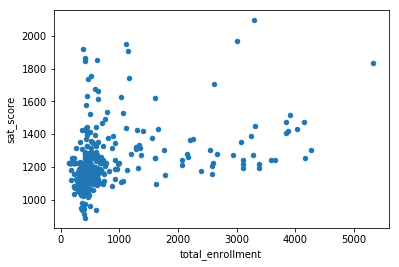

In [97]:
import matplotlib.pyplot as plt
combined["total_enrollment"] = combined["total_enrollment_x"] # make sure it looks like in the dataquest's exrecise
combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

## Exploring Schools With Low SAT Scores and Enrollment

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [99]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

## Plotting language learning percentage

Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.

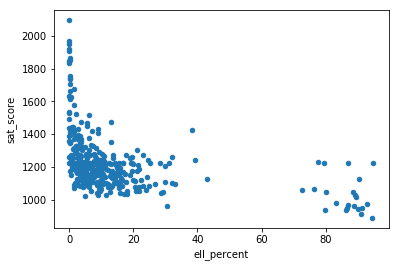

In [101]:
combined["ell_percent"] = combined["ell_percent_x"] # make sure it looks like in the dataquest's exrecise
combined.plot.scatter(x="ell_percent", y="sat_score")
plt.show()

## Mapping the schools with Basemap

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district. The map will show us which areas of the city have a lot of English language learners.

We learned how to use the Basemap package to create maps in the Visualizing Geographic Data mission. The Basemap package enables us to create high-quality maps, plot points over them, and then draw coastlines and other features.

We extracted the coordinates for all of the schools earlier, and stored them in the lat and lon columns. The coordinates will enable us to plot all of the schools on a map of New York City.

We can set up the map with this code:

``` python
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
```

This code snippet will create a map that centers on New York City (llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the geographic area the map depicts). It will also draw coastlines and rivers accordingly.

Now all we need to do is convert our lat and lon coordinates to x and y coordinates so we can plot them on top of the map. This will show us where all of the schools in our data set are located.



/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


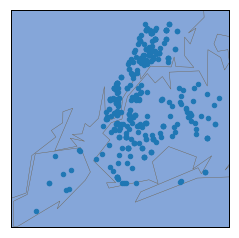

In [111]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)

plt.show()

## Plotting out statistics

From the map above, we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.

Now that we've plotted the school locations, we can begin to display meaningful information on the maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword argument c into the scatter() method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers accordingly.

The method will convert the sequence of numbers we pass into the c keyword argument to values ranging from 0 to 1. It will then map these values onto a colormap. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points for low numbers, and yellow points for high numbers.

For example, let's say we plotted ell_percent by school. If we pass in the keyword argument c=combined["ell_percent"], then the method would shade a school with a high ell_percent yellow, and a school with a low ell_percent green. We can specify the colormap we want to use by passing the cmap keyword argument to the scatter() method.

/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


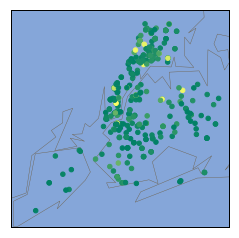

In [112]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")

plt.show()

## Calculating district-level statistics

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot ell_percent district-by-district instead of school-by-school.

In the last mission, we used the pandas.DataFrame.groupby() followed by the agg() method on the resulting object to find the mean class size for each unique DBN. The principle is exactly the same, except that here we'd find the mean of each column for each unique value in school_dist.

In [113]:
import numpy as np

districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD_x,...,Council District_y,Census Tract_y,BIN_y,BBL_y,lat_y,lon_y,total_enrollment,ell_percent,lon,lat
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377,668.500000,10.000000,-73.982377,40.719022
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386,605.604167,13.006250,-73.991386,40.739699
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370,661.416667,9.025000,-73.977370,40.781574
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215,569.285714,4.557143,-73.943215,40.793449
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251,605.857143,4.157143,-73.949251,40.817077


## Plotting percent of English learners by district

Now that we've taken the means of all of the columns, we can plot out ell_percent by district. Not only did we find the mean of ell_percent, but we also took the means of the lon and lat columns, which will give us the coordinates for the center of each district.

/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/thi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


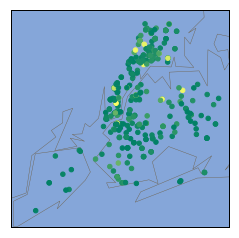

In [114]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")

plt.show()

In this mission, we found correlations, created visualizations, and mapped out our schools! Now we have all the tools we need to analyze the data in greater depth.

Along the way, we learned:

How to create school and district-level maps
How to find correlations, and what those correlations mean
Why we should plot data out, rather than relying on the r value alone
That ell_percent has a strong negative correlation with sat_score
We now have the skills to analyze data sets and explain the quirks we find. These are essential skills for any data science professional.

Next, we'll use the skills and tools we've developed to analyze the New York City high school data more fully in a guided project.